<h1>HR Analytics (analyticsvidhya.com)</h1>

Client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

1)They first identify a set of employees based on recommendations/ past performance
2)Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
3)At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

<b> Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<b>Load dataframe

In [2]:
df = pd.read_csv('train_LZdllcl.csv')
df.sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
16658,76036,Sales & Marketing,region_20,Bachelor's,m,sourcing,1,40,5.0,11,1,0,47,0
28137,64056,Sales & Marketing,region_2,NaN,f,sourcing,1,22,5.0,2,0,0,46,0
40762,13030,Legal,region_2,Bachelor's,f,other,1,30,2.0,2,0,0,65,0
53384,22762,Sales & Marketing,region_7,Bachelor's,m,other,2,33,1.0,6,0,0,47,0
7469,47027,Analytics,region_13,Master's & above,m,sourcing,1,32,5.0,4,1,0,82,0


In [3]:
#test set

df_test = pd.read_csv('test_2umaH9m.csv')
test_id = df_test['employee_id']

In [4]:
df_test.shape

(23490, 13)

<h1>EDA</h1>

used pandas profilig module for visualize data columns and more

In [5]:
# import pandas_profiling
# from pandas_profiling import ProfileReport

In [6]:
#profile = ProfileReport(df,title="HR_Analytics")

In [7]:
#profile.to_file(output_file='HR_Analytics.html')

In [8]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
#test set

df_test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [10]:
df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [11]:
df['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

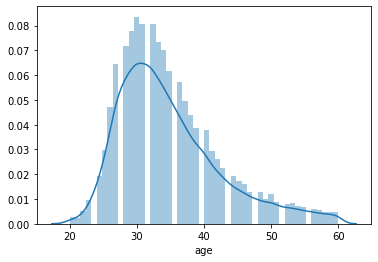

In [12]:
sns.distplot(df['age'])

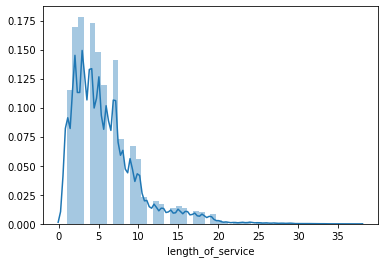

In [13]:
sns.distplot(df['length_of_service'])

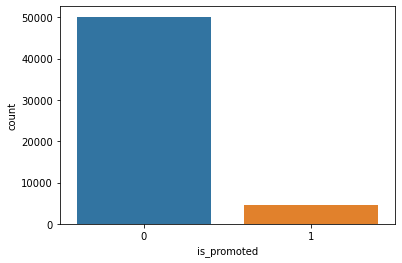

In [14]:
sns.countplot(df['is_promoted'])

<h3><b> Missing value treatment </h3></b>

Two fields have missing value education and previous_year_rating

In [15]:
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

The field has most of the values with <b>Bachelor's </b> 

In [16]:
#fill up the missing values with ffill


df['education'] = df['education'].ffill()

In [17]:
#test set

df_test['education'] = df_test['education'].ffill()

In [18]:
df['education'].value_counts()

Bachelor's          38390
Master's & above    15579
Below Secondary       839
Name: education, dtype: int64

In [19]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

let's check whose previous year rating is NULL

In [20]:
df[df['previous_year_rating'].isnull()].groupby('length_of_service').agg('employee_id').count()

length_of_service
1    4124
Name: employee_id, dtype: int64

<b><font color="red"> Only length of service=1 has previous_year_rating NaN, may be because they are fresher, </b></font>
lets see whose service length is 1, what is the rating of others

In [21]:
df[df['length_of_service']==1].groupby('previous_year_rating').agg('employee_id').count()

previous_year_rating
1.0     44
2.0     43
3.0    158
4.0    114
5.0     64
Name: employee_id, dtype: int64

In average their rating is nearly "3" so we'll fill the missing values with 0 because others must be too new to be evaluated

In [22]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(0)

In [23]:
#test set

df_test['previous_year_rating'] = df_test['previous_year_rating'].fillna(0)

In [24]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [25]:
#test set

df_test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

<h1>Feature Engineering

In [26]:
#find categorical columns

df.select_dtypes(include='object').columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

So we have to create dummies for the above fields

In [27]:
 columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']
#columns = ['department', 'education', 'gender', 'recruitment_channel']
for col_name in columns:
        df = pd.get_dummies(df, columns=[col_name])

In [28]:
#test set

columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']
for col_name in columns:
        df_test = pd.get_dummies(df_test, columns=[col_name])

In [29]:
df.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region

In [30]:
#test set

df_test.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'r

In [31]:
df = df.drop('employee_id', axis=1) #drop it because of unique feature
#df= df.drop('region', axis=1)

In [32]:
#test set

df_test = df_test.drop('employee_id', axis=1)

<b>We are going to bin the age in 0-25, 25-35, 35-45 and above 45

In [33]:
df['20-25age'] = np.where(df['age']<=25,1,0)
df['25-35age'] = np.where((df['age']>25) & (df['age']<=35),1,0)
df['35-45age'] = np.where((df['age']>35) & (df['age']<=45),1,0)
df['>45age'] = np.where(df['age']>45,1,0)

In [34]:
# #test set

df_test['20-25age'] = np.where(df_test['age']<=25,1,0)
df_test['25-35age'] = np.where((df_test['age']>25) & (df_test['age']<=35),1,0)
df_test['35-45age'] = np.where((df_test['age']>35) & (df_test['age']<=45),1,0)
df_test['>45age'] = np.where(df_test['age']>45,1,0)

In [35]:
df.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_r

In [36]:
 df = df.drop('age', axis=1) #drop it because of bin

In [37]:
#test set

df_test = df_test.drop('age', axis=1)

---
<b><h3>Preparing data for model building

In [38]:
#Divide the data into Feature and Label component

X = df.drop('is_promoted',axis=1).values
y = df['is_promoted'].values

In [39]:
#test set

Xt = df_test.values

In [40]:
#split the data in train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [41]:
#scale the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
#test_value

Xt = scaler.transform(Xt)

---


<h1>4. Apply Machine Learning Models for prediction
    
    
---

<h3>GradientBoostingClassifier

In [43]:
# from sklearn.model_selection import GridSearchCV

In [44]:
# from sklearn.ensemble import GradientBoostingClassifier
# GradientBoostingClassifier()

In [45]:
# gb = GradientBoostingClassifier()
# parameters = {
#     'n_estimators': [140, 160, 180],
#     'max_depth': [6,8,10],
#     'learning_rate': [0.05, 0.1]
# }

# cv_gb = GridSearchCV(gb, parameters, cv=5)

In [46]:
# model_gb = GradientBoostingClassifier(n_estimators=160, max_depth=6, learning_rate=0.1)
# model_gb.fit(X_train,y_train)

In [47]:
#best parameters

# cv_gb.best_params_

In [48]:
# #predict the value of test set

# pred_gb = model_gb.predict(X_test)

In [49]:
# from sklearn.metrics import classification_report

# print (classification_report(y_test,pred_gb))

In [50]:
# #train set

# pred_train_gb = model_gb.predict(X_train)
# print (classification_report(y_train,pred_train_gb))

In [51]:
 feature = df.drop('is_promoted',axis=1)
# imp_feat=pd.Series(model_gb.feature_importances_,index=feature.columns)
# plt.figure(figsize=(12,8))
# imp_feat.sort_values(ascending=False).plot(kind='bar')

In [52]:
#test set

# pred_gb_test = model_gb.predict(Xt)

In [53]:
# final_df = pd.DataFrame(columns=['employee_id','is_promoted'],index=range(23490))

In [54]:
# final_df['employee_id'] = test_id
# final_df['is_promoted'] = pred_gb_test

# final_df

In [55]:
#final_df.to_csv('gb_pred_v1.csv', index = False)

<h3>XGBClassifier

In [56]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from CatBoost import CatBoostClassifier

from sklearn.metrics import classification_report

In [57]:
#model_xgb = XGBClassifier(n_estimators=160, max_depth=8, eta=0.1, subsample = 0.08)

# model_xgb = XGBClassifier(learning_rate =0.1,n_estimators=494,max_depth=5,subsample = 0.70,verbosity = 0,scale_pos_weight = 2.5,
#                                            updater ="grow_histmaker",base_score  = 0.2) #f1=51

model_lgbm = LGBMClassifier(subsample_freq = 2,objective ="binary",importance_type = "gain",verbosity = -1,
                                             max_bin = 60,
                                             num_leaves = 300,
                                             boosting_type = 'dart',
                                             learning_rate=0.15,
                                             n_estimators=494,
                                             max_depth=5,
                                             scale_pos_weight=2.5)

# model_CB = CatBoostClassifier(learning_rate=0.15,n_estimators=494,
#                                                  subsample=0.085,
#                                                  max_depth=5,
#                                                  scale_pos_weight=2.5)

model_lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='dart', importance_type='gain', learning_rate=0.15,
               max_bin=60, max_depth=5, n_estimators=494, num_leaves=300,
               objective='binary', scale_pos_weight=2.5, subsample_freq=2,
               verbosity=-1)

In [58]:
#predict the value of test set

pred_lgbm = model_lgbm.predict(X_test)

In [59]:
print (classification_report(y_test,pred_lgbm))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     15110
           1       0.69      0.41      0.52      1333

    accuracy                           0.94     16443
   macro avg       0.82      0.70      0.74     16443
weighted avg       0.93      0.94      0.93     16443



In [60]:
pred_train_lgbm = model_lgbm.predict(X_train)
print (classification_report(y_train,pred_train_lgbm))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     35030
           1       0.82      0.49      0.61      3335

    accuracy                           0.95     38365
   macro avg       0.89      0.74      0.79     38365
weighted avg       0.94      0.95      0.94     38365



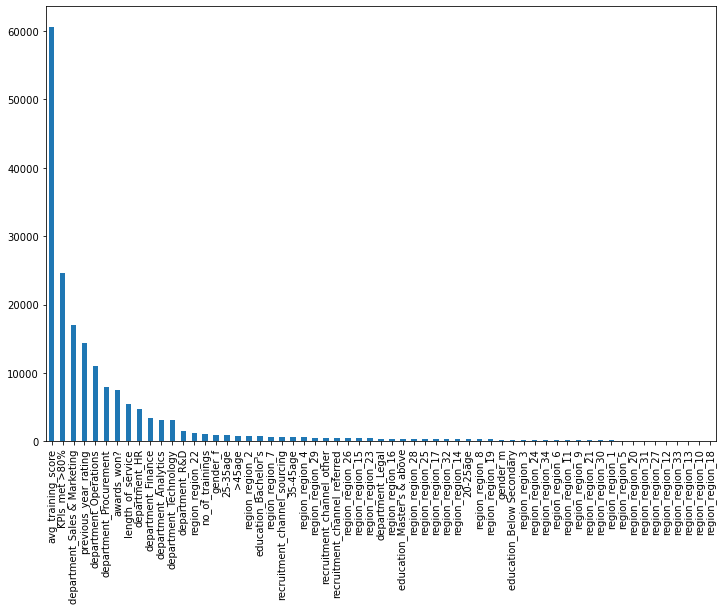

In [61]:
imp_feat=pd.Series(model_lgbm.feature_importances_,index=feature.columns)
plt.figure(figsize=(12,8))
imp_feat.sort_values(ascending=False).plot(kind='bar')

In [62]:
#test set

pred_lgbm_test = model_lgbm.predict(Xt)

In [63]:
final_df = pd.DataFrame(columns=['employee_id','is_promoted'],index=range(23490))

In [64]:
final_df['employee_id'] = test_id
final_df['is_promoted'] = pred_lgbm_test

final_df

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [65]:
final_df.to_csv('_pred_lgbm_v3.csv', index = False)

<b> oversamppling approch

In [66]:
# from imblearn.over_sampling import SMOTE

In [67]:
# oversample = SMOTE()
# Xs, ys = oversample.fit_resample(X, y)

In [68]:
# X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.30, random_state=42)

In [69]:
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [70]:
# #model_gb.fit(X_train,y_train)
# pred_gb = model_gb.predict(X_test)
# print (classification_report(y_test,pred_gb))

In [71]:
#test set

# pred_gb_test_v2 = model_gb.predict(Xt)

In [72]:
# final_df_v2 = pd.DataFrame(columns=['employee_id','is_promoted'],index=range(23490))

In [73]:
# final_df_v2['employee_id'] = test_id
# final_df_v2['is_promoted'] = pred_gb_test_v2

# final_df_v2

In [74]:
# final_df_v2.to_csv('gb_pred_v2.csv', index = False)